In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/kaggle/input/metrocar/metrocar.csv')

In [6]:
print(df.head())  # Display the first few rows
print(df.info())  # Get information about the dataset

                   app_download_key platform          download_ts  \
0  089c3299cb7cf4cf752711d29d916ac1      ios  2021-12-11 05:05:01   
1  17f8d5dd82056d27105f9c28be15668a  android  2021-05-24 16:35:48   
2  ea9194aa4c722172e59183a968613a7b      ios  2021-09-12 15:55:14   
3  cecf8d52ce305f077d5c2fffd22f9b10  android  2021-09-11 14:20:59   
4  8221632857a6aaa5032752b5c7be31f0      ios  2021-06-16 10:01:11   

                         session_id  user_id age_range            signup_ts  \
0  089c3299cb7cf4cf752711d29d916ac1   116687     25-34  2021-12-11 11:18:01   
1  17f8d5dd82056d27105f9c28be15668a   106866     45-54  2021-05-25 19:32:48   
2  ea9194aa4c722172e59183a968613a7b   112324   Unknown  2021-09-12 23:11:14   
3  cecf8d52ce305f077d5c2fffd22f9b10   112281     35-44  2021-09-12 13:08:59   
4  8221632857a6aaa5032752b5c7be31f0   108020     35-44  2021-06-16 23:28:11   

   ride_id  driver_id           request_ts  ...            pickup_ts  \
0  3000288        NaN  2021-12-12 08:5

In [12]:
# Display the count of missing values for each column
df.isnull().sum()

app_download_key           0
platform                   0
download_ts                0
session_id                 0
user_id                    0
age_range                  0
signup_ts                  0
ride_id                    0
driver_id              24968
request_ts                 0
accept_ts              24968
pickup_location            0
dropoff_location           0
pickup_ts              29566
dropoff_ts             29566
cancel_ts              20434
transaction_id         29566
purchase_amount_usd    29566
charge_status          29566
transaction_ts         29566
review_id              35744
rating                 35744
review                 35744
dtype: int64

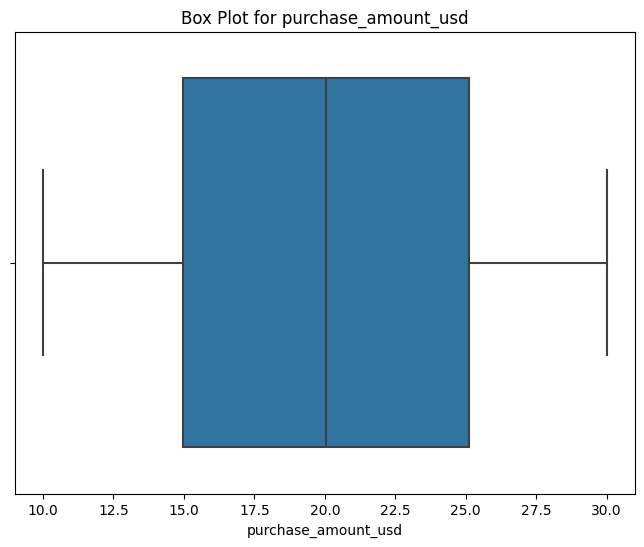

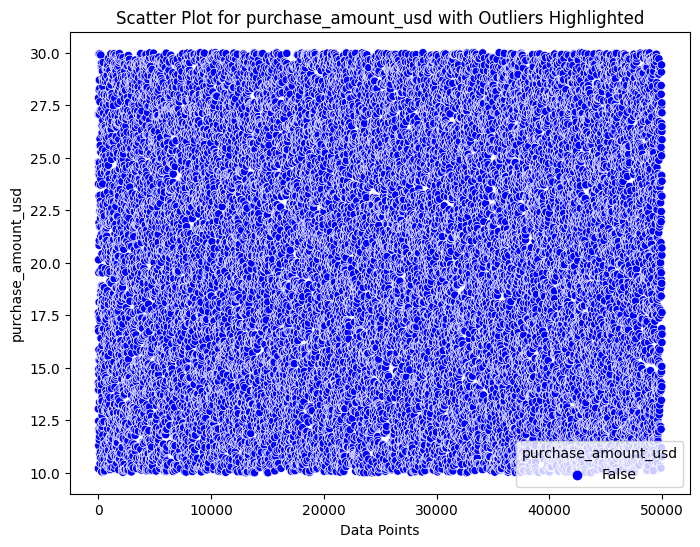

In [7]:
# Check for outliers
numeric_column_name = 'purchase_amount_usd'

# Identify outliers using z-score
z_scores = np.abs((df[numeric_column_name] - df[numeric_column_name].mean()) / df[numeric_column_name].std())
outliers = df[z_scores > 3]  # Adjust the threshold as needed

# Plot box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[numeric_column_name])
plt.title(f'Box Plot for {numeric_column_name}')
plt.show()

# Plot scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=df[numeric_column_name], hue=(z_scores > 3), palette={False: 'blue', True: 'red'})
plt.title(f'Scatter Plot for {numeric_column_name} with Outliers Highlighted')
plt.xlabel('Data Points')
plt.ylabel(numeric_column_name)
plt.show()


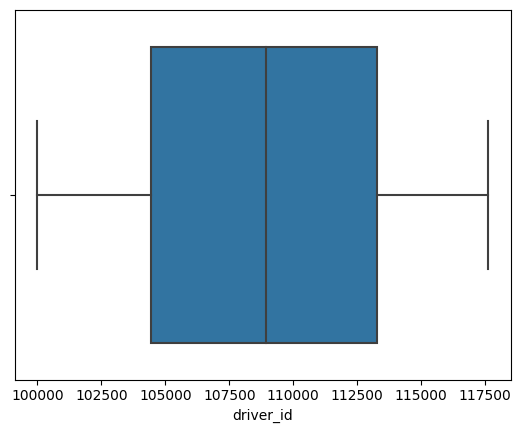

In [13]:
sns.boxplot(x=df['driver_id'])
plt.show()

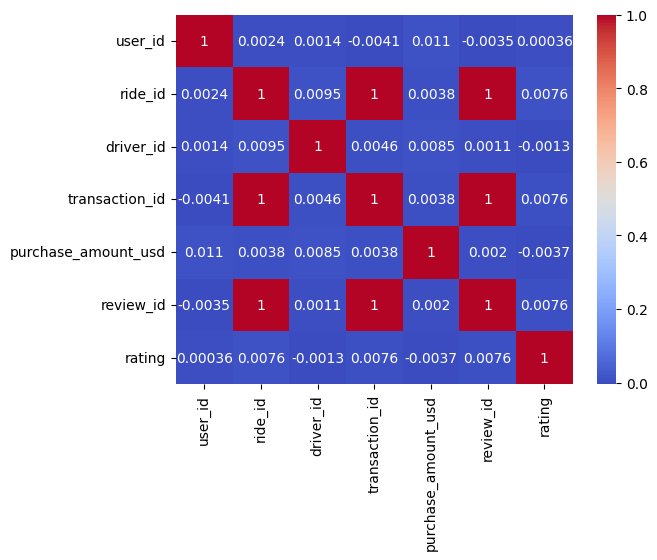

In [11]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
